[![AnalyticsDojo](https://s3.amazonaws.com/analyticsdojo/logo/final-logo.png)](http://rpi.analyticsdojo.com)
<center><h1>Neural Networks (Mulitilayer Perceptron) with Numpy and Scikit Learn</h1></center>
<center><h3><a href = 'http://rpi.analyticsdojo.com'>rpi.analyticsdojo.com</a></h3></center>


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#Iris is available from the sklearn package
iris = load_iris()
X, y = iris.data, iris.target

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123,
                                                    stratify=y)

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

All: [ 33.33333333  33.33333333  33.33333333]
Training: [ 33.33333333  33.33333333  33.33333333]
Test: [ 33.33333333  33.33333333  33.33333333]


### Prediction using Multilayer Perceptron (Simple NN)
- [Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- length is the number of hidden layers. 
- Maximum iterations the number of steps before it ends gradient decent. 

- `activation` is the activation function.  

```
‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x.
‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
‘relu’, the rectified linear unit function, returns f(x) = max(0, x).
```
- alpha : float, optional, default 0.0001 (L2 penalty (regularization term) parameter.)
- Solver : ‘lbfgs’ is an optimizer in the family of quasi-Newton methods. ‘sgd’ refers to stochastic gradient descent.‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba


In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

#This creates a model object.
classifier = MLPClassifier()
classifier.fit(train_X, train_y)
#This creates the prediction. 
pred_y_train = classifier.predict(train_X)
pred_y_test = classifier.predict(test_X)
#This calculates the accuracy.
print("Train score: ", metrics.accuracy_score(train_y, pred_y_train) )
print("Test score: ", metrics.accuracy_score(test_y, pred_y_test) )


Train score:  0.986666666667
Test score:  0.96


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

#4 layers
#This creates a model object.
classifier = MLPClassifier(max_iter= 10000, activation= 'relu', solver='sgd', alpha=1e-5, hidden_layer_sizes=(10,10), random_state=1)
#This fits the model object to the data.
classifier.fit(train_X, train_y)
#This creates the prediction. 
pred_y = classifier.predict(test_X)
#This calculates the accuracy.
print("Train score: ", metrics.accuracy_score(train_y, pred_y_train) )
print("Test score: ", metrics.accuracy_score(test_y, pred_y_test) )



Train score:  0.986666666667
Test score:  0.96


In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

#4 layers
#This creates a model object.
classifier = MLPClassifier(max_iter= 10000, activation= 'relu', solver='sgd', alpha=1e-5, hidden_layer_sizes=(10,10,10,10), random_state=1)
#This fits the model object to the data.
classifier.fit(train_X, train_y)
#This creates the prediction. 
pred_y = classifier.predict(test_X)
#This calculates the accuracy.
print("Train score: ", metrics.accuracy_score(train_y, pred_y_train) )
print("Test score: ", metrics.accuracy_score(test_y, pred_y_test) )



Train score:  0.986666666667
Test score:  0.96


In [5]:
from sklearn import metrics

#This calculates the accuracy.
print("Manual Accuracy:", np.sum(pred_y == test_y) / float(len(test_y)))
print("Metrics score: ", metrics.accuracy_score(test_y, pred_y) )
print("Classifier score: ", classifier.score(test_X, test_y) )


Manual Accuracy: 0.96
Metrics score:  0.96
Classifier score:  0.96


### Activation Functions
- All activation functions have to be differenciable.

In [6]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

Saving figure activation_functions_plot


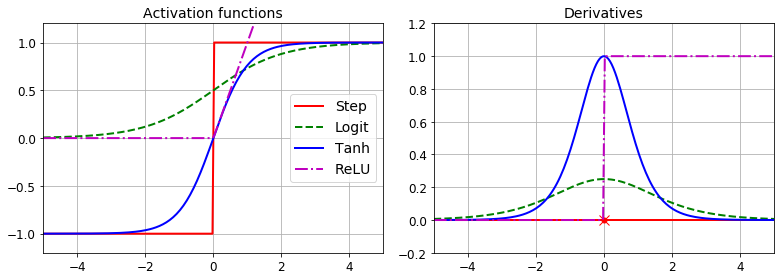

In [7]:
import numpy as np
import os
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "/home/jovyan/techfundamentals-fall2017-materials/classes/13-deep-learning"
CHAPTER_ID = "13-deep-learning"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, 'images', fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()


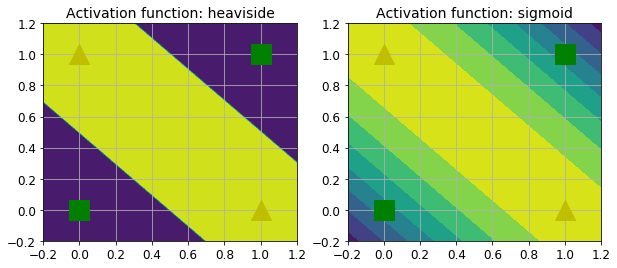

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)